# Binary black hole initial data {#example_bbh_id}

In this example we run the elliptic solver to compute initial data for binary
black holes.

In [1]:
# Distributed under the MIT License.
# See LICENSE.txt for details.

# Dependencies:
%pip install numpy matplotlib pandas 'h5py>=3.0.0' ruamel.yaml

Note: you may need to restart the kernel to use updated packages.


In [2]:
import h5py
import matplotlib.pyplot as plt
import multiprocessing
import numpy as np
import os
import pandas as pd
from ruamel.yaml import YAML

plt.style.use("../plots.mplstyle")

In [3]:
%%bash
# Clean up output files from previous runs
rm -f Bbh*.h5

First, make sure you have compiled the `SolveXcts` executable. Put in the path
to your build directory below. Make sure you have compiled in `Release` mode.

In [4]:

SPECTRE_BUILD = os.getenv("SPECTRE_BUILD")

SPECTRE_SOURCE = os.getenv("SPECTRE_SOURCE")

SPECTRE_INSTALL = "/work/spectre/install_release" #os.getenv("SPECTRE_INSTALL")

print(SPECTRE_BUILD, SPECTRE_SOURCE, SPECTRE_INSTALL)

/work/spectre/build /work/spectre/source /work/spectre/install_release



## Setup input file

We set up an input file based on the
`tests/InputFiles/Xcts/BinaryBlackHole.yaml` example:

In [ ]:
def get_section_

In [5]:
# Load example input file
load_input_file_path = os.path.join(
    SPECTRE_SOURCE, "tests/InputFiles/Xcts/BinaryBlackHole.yaml"
)
yaml = YAML()

changed_input_file = []

with open(load_input_file_path, "r") as open_input_file:
    input_file = yaml.load_all(open_input_file)

    for section in input_file:

        dsec = dict(section)

        #print(dsec)

        keys = dsec.keys()

        #print(keys)

        if "Observers" in keys:
            dsec["Observers"].update({"VolumeFileName": "BbhVolume"})
            dsec["Observers"].update({"ReductionFileName": "BbhReductions"})

        changed_input_file.append(dsec)
        

for item in changed_input_file:
    print(item, "\n")

# Write modified input file
with open("Bbh.yaml", "w") as open_input_file:
    yaml.dump_all(changed_input_file, open_input_file)

{'Executable': 'SolveXcts', 'Testing': ordereddict({'Check': 'parse', 'Timeout': 30, 'Priority': 'High'}), 'ExpectedOutput': ['BbhReductions.h5', 'BbhVolume0.h5'], 'OutputFileChecks': [ordereddict({'Label': 'Norms', 'Subfile': 'Norms.dat', 'FileGlob': 'BbhReductions.h5', 'ExpectedData': [[5, 20304, 1.7453276204846e+33, 1.10996259399346, 0.868051629831159, 0.62812790585204, 0.00494959532218436, 0.00125936870550045, 0.00129835755854743, 0.00126478484974052], [5, 20304, 1.7453276204846e+33, 1.10996259399346, 0.868051629831159, 0.62812790585204, 0.00494959532218436, 0.00125936870550045, 0.00129835755854743, 0.00126478484974052], [5, 20304, 1.7453276204846e+33, 1.10996259399346, 0.868051629831159, 0.62812790585204, 0.00494959532218436, 0.00125936870550045, 0.00129835755854743, 0.00126478484974052]], 'AbsoluteTolerance': 0.0, 'RelativeTolerance': 1e-09}), ordereddict({'Label': 'Nonlinear solver convergence', 'Subfile': 'NewtonRaphsonResiduals.dat', 'FileGlob': 'BbhReductions.h5', 'SkipColumn

## Run executable

We pass the input file to the `SolveXcts` executable to solve the elliptic
problem. It will take a few minutes to complete on ~10 cores. Adapt the command
below to your system, or run the `SolveXcts` executable with the `Bbh.yaml`
input file manually.

In [6]:
NUM_CORES = multiprocessing.cpu_count()
SOLVE_XCTS = os.path.join(SPECTRE_INSTALL, "bin/SolveXcts")
!{SOLVE_XCTS} --input-file Bbh.yaml +p {NUM_CORES}

Charm++: standalone mode (not using charmrun)
Charm++> Running in Multicore mode: 12 threads (PEs)
Converse/Charm++ Commit ID: c5f1dcd
CharmLB> Load balancer assumes all CPUs are same.
Charm++> Running on 1 hosts (1 sockets x 12 cores x 1 PUs = 12-way SMP)
Charm++> cpu topology info is gathered in 0.000 seconds.

Executing 'SolveXcts' using 12 processors.
Launch command line: /work/spectre/install_release/bin/SolveXcts --input-file Bbh.yaml
Charm++ startup time in seconds: 2.294085
Date and time at startup: Sat Sep  7 10:09:21 2024

SpECTRE Build Information:
Version:                      2024.08.03
Compiled on host:             26817685af46
Compiled in directory:        /work/spectre/build
Source directory is:          /work/spectre/source
Compiled on git branch:       id_fix
Compiled on git revision:     a1d42b922
Linked on:                    Fri Sep  6 11:31:56 2024
Build type:                   Release

The following options differ from their suggested values:

Option parsing comp

## Load initial data into evolutions

The executable has created H5 output files with volume data and diagnostics:

In [7]:
!ls *.h5

BbhReductions.h5  BbhVolume0.h5


The volume data in the `BbhVolume*.h5` files (one per node) can be imported into
evolution executables. It contains the following data:

In [8]:
!h5ls -r BbhVolume*.h5

/                        Group
/VolumeData.vol          Group
/VolumeData.vol/ObservationId1423324405707320626 Group
/VolumeData.vol/ObservationId1423324405707320626/ConformalFactor Dataset {61344}
/VolumeData.vol/ObservationId1423324405707320626/ExtrinsicCurvature_xx Dataset {61344}
/VolumeData.vol/ObservationId1423324405707320626/ExtrinsicCurvature_yx Dataset {61344}
/VolumeData.vol/ObservationId1423324405707320626/ExtrinsicCurvature_yy Dataset {61344}
/VolumeData.vol/ObservationId1423324405707320626/ExtrinsicCurvature_zx Dataset {61344}
/VolumeData.vol/ObservationId1423324405707320626/ExtrinsicCurvature_zy Dataset {61344}
/VolumeData.vol/ObservationId1423324405707320626/ExtrinsicCurvature_zz Dataset {61344}
/VolumeData.vol/ObservationId1423324405707320626/HamiltonianConstraint Dataset {61344}
/VolumeData.vol/ObservationId1423324405707320626/InertialCoordinates_x Dataset {61344}
/VolumeData.vol/ObservationId1423324405707320626/InertialCoordinates_y Dataset {61344}
/VolumeData.vol/Obs

- `Lapse` ($\alpha$), `Shift` ($\beta^i$), `SpatialMetric` ($\gamma_{ij}$) and
  `ExtrinsicCurvature` ($K_{ij}$): These quantities solve the Einstein
  constraint equations in "corotating" coordinates, such that, e.g.,
  $\partial_t K = 0$. The black holes remain approximately at the same
  coordinate positions when starting to evolve the initial data in these
  coordinates. Note that $\beta^i \propto r$ in these coordinates, which can be
  large and hence numerically undesireable.
- `ShiftExcess` ($\beta_\text{excess}^i$): This shift vector excludes the
  rotational part, so it is asymptotically small. Import `ShiftExcess` instead
  of `Shift` in an evolution to obtain coordinates in which the black holes are
  orbiting. Note that only
  \begin{equation}
    \beta^i = \beta_\text{background}^i + \beta_\text{excess}^i
  \end{equation}
  fulfills all coordinate conditions imposed on the initial data, such as
  $\partial_t K = 0$. The background shift is typically
  \begin{equation}
    \beta_\text{background}^i = \epsilon^{ijk} \Omega^{j} x^k + \dot{a}_0 x^i
    \text{,}
  \end{equation}
  where $\Omega$ is the orbital angular velocity and $\dot{a}_0$ is the
  expansion parameter.
  See the [Xcts::AnalyticData::Binary](https://spectre-code.org/classXcts_1_1AnalyticData_1_1Binary.html)
  class for details.

## Plot diagnostics

We plot the diagnostics in `BbhReductions.h5` to see what happened during the
elliptic solve:

In [7]:
# These routines read the data and process them a bit. You can skip to the plot
# below to see the results.


def split_iteration_sequence(data):
    left_bounds = np.where(data.index == 0)[0]
    right_bounds = list(left_bounds[1:]) + [-1]
    return [data.iloc[i:j] for i, j in zip(left_bounds, right_bounds)]


def load_dataset(subfile):
    legend = subfile.attrs["Legend"]
    return pd.DataFrame(data=subfile, columns=legend).set_index(legend[0])


with h5py.File("BbhReductions.h5", "r") as h5_file:
    nonlinear_residuals = load_dataset(h5_file["NewtonRaphsonResiduals.dat"])
    all_linear_residuals = split_iteration_sequence(
        load_dataset(h5_file["GmresResiduals.dat"])
    )

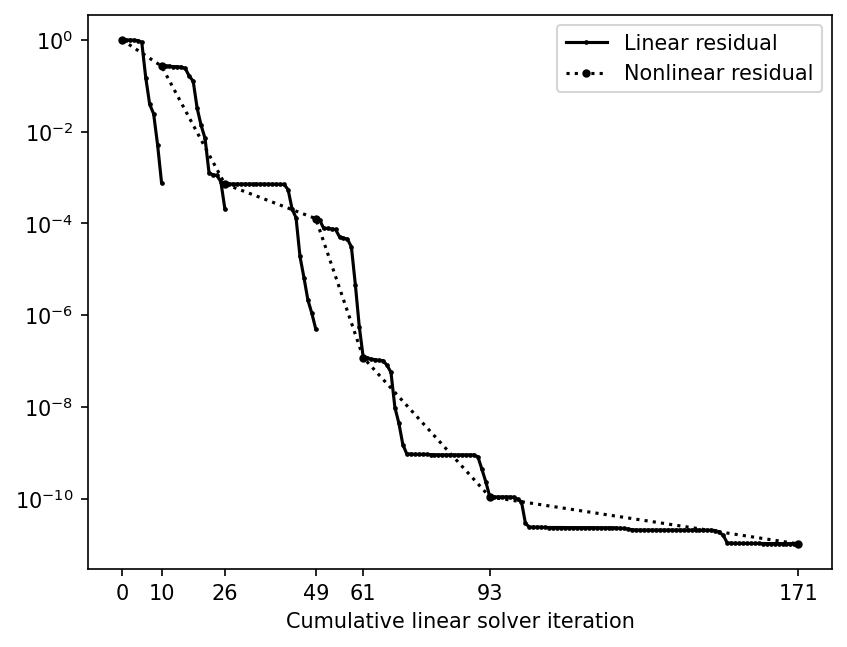

In [8]:
# Plot linear residuals
n = 0
lin_label = "Linear residual"
for linear_residuals in all_linear_residuals:
    plt.semilogy(
        linear_residuals.index + n,
        linear_residuals["Residual"]
        / all_linear_residuals[0]["Residual"].iloc[0],
        color="black",
        label=lin_label,
        marker=".",
        markersize=2.5,
        zorder=30,
    )
    n += len(linear_residuals) - 1
    lin_label = None

# Plot nonlinear residuals
nonlin_xticks = [0] + list(
    np.cumsum([len(l) - 1 for l in all_linear_residuals])
)
plt.semilogy(
    nonlin_xticks,
    nonlinear_residuals["Residual"] / nonlinear_residuals["Residual"].iloc[0],
    color="black",
    ls="dotted",
    marker=".",
    label="Nonlinear residual",
    zorder=40,
)
plt.xticks(nonlin_xticks)
xticks = (
    range(len(all_linear_residuals))
    if nonlinear_residuals is None
    else nonlin_xticks
)

plt.xlabel("Cumulative linear solver iteration")
plt.legend();

The plot shows the convergence of the nonlinear solver (dotted line), along with
the convergence of the linear solver that runs in each nonlinear iteration
(solid line). A few things to note:

- The residual converges down to almost machine precision, but that doesn't
  reflect the discretization error of the solution. It only shows that we have
  solved the discretized problem very accurately. To get an idea of the
  discretization error we would have to look at quantities such as constraint
  norms.
- The Newton-Raphson nonlinear solver converges slowly at first, and then begins
  to converge quadratically once we are closer to the solution and hence the
  linearization is more accurate.
- The linear solver needs only a few steps to converge, which is a feature of
  our multigrid-Schwarz preconditioner.

You can read more about the elliptic solver in this paper:

- N. L. Vu _et al_., A scalable elliptic solver with task-based parallelism for
  the SpECTRE numerical relativity code (2022),
  [arXiv:2111.06767](https://arxiv.org/abs/2111.06767)